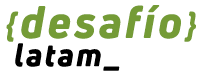

# Prueba - Fundamentos Data Science

## Objetivo
- Implementar los contenidos aprendidos a lo largo de las 8 unidades para resolver dos problemas de carácter obligatorio.
- Se deben desarrollar dos desafíos aplicando lo aprendido en el módulo Fundamentos de DataScience.
- Ambos desafíos presentarán un enunciado a solucionar, así como una descripción de los datosdisponibles a utilizar.
- Cada una de las respuestas deben considerar los requerimientos mínimos y buenas prácticasdetalladas a continuación.

## Consideraciones Generales
La prueba debe desarrollarse en consideración a los siguientes puntos:

- Una sección llamada <b>Preliminares</b> donde se realiza la descripción del problema y objetivos, asícomo explicar cómo implementarán su solución (debe considerar qué criterios de optimización y métricas de desempeño).
- Una sección llamada <b>Aspectos computacionales</b> donde se describirán las librerías y módulos a implementar, así como las funciones generadas y su objetivo.
- Una sección llamada <b>Descripción</b> donde se generará un análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones).
- Una sección llamada <b>Modelación descriptiva</b>, que buscará definir cuáles son los principales determinantes del objeto de estudio. En base a esta sección se podrá construír o depurar el modelo predictivo.
- Una sección llamada <b>Modelación predictiva</b>, donde se implementará una solución analítica que aumente las métricas de desempeño. Se solicitan por lo menos 3 modelos predictivos, donde deberán reportar las principales métricas. Cada modelo predictivo debe tener una reseña sobre el por qué se diseño de esa forma.



## Hito 1: Sesión Presencial 1, Unidad 7
Completar el punto de Preliminares, así como Aspectos computacionales.

Elementos a considerar en éste hito:
- Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. (3 puntos)
- Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. (1 punto)
- Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. (1punto)
- Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados.

# Aspectos Computacionales

- anaconda                  2019.07
- anaconda-client           1.7.2
- anaconda-navigator        1.9.7
- conda                     4.7.12
- conda-env                 2.6.0
- ipython                   7.6.1
- jupyter                   1.0.0 
- jupyter_client            5.3.1
- jupyterlab                1.0.2
- jupyterlab_server         1.0.0
- matplotlib                3.2.2
- missingno                 0.4.2
- numpy                     1.16.4
- pandas                    1.0.5
- pip                       20.1.1
- plotly                    3.10.0
- python                    3.7.3
- scikit-learn              0.21.2
- scipy                     1.5.0
- seaborn                   0.9.0
- statsmodels               0.10.0

# Preliminares

## Desafío 2: Rendimiento escolar¶
### Enunciado
Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos dos escuelas para perfilar a los estudiantes. 

<br>De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de `famrel` a `health` ) y ver si éstas se pueden abstraer en categorías latentes.

### Aspectos adicionales a considerar
- La base de datos presenta una serie de anomalías. En la escuela no tienen buenas prácticas sobre cómo ingresar datos, por lo que existen datos perdidos que están registrados bajo tres categorías: `nulidade`, `sem validade`, `zero`. De manera adicional, hay __3 variables numéricas que se registraron como strings__, cuya interpretación en pandas devuelve una estructura de datos genérica. Finalmente, la base está con un encoding distinto al normal y los delimitadores son distintos.
- Para simplficar el análisis y su posterior inclusión en un modelo predictivo, se sugiere recodificar las variables binarias como 0 y 1. Se recomienda seguir en criterio de asignarle 1 a aquellas categorías minoritarias.
- El procedimiento también debe aplicarse para aquelas variables nominales con más de 2 categorías siguiendo la misma lógica.
- En la parte de modelación descriptiva, se deben generar modelos saturados por cada una de las notas registradas en G1 , G2 y G3.
- Para la parte de modelación predictiva, se debe generar un modelo para predecir las notas en G3 .

### Vector objetivo [income]
<div class="alert alert-block alert-warning">
<b>Comentario:</b> 
<br>"Esto corresponde a un problema de Regresión (Predicción)".


</div><br>


In [184]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import scipy.stats as stats
import missingno

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
#cargamos el dataframe y lo asignamos al valor 'df_student'
df_student = pd.read_csv('students.csv', sep='|', encoding='iso-8859-1').drop(columns = 'Unnamed: 0', axis = 1) #con el argumento sep separamos las celdas de la base de dato

In [110]:
df_student.replace({'nulidade': np.nan, 'sem validade': np.nan, 'zero': np.nan}, inplace=True)

In [111]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [114]:
df_student.shape

(395, 33)

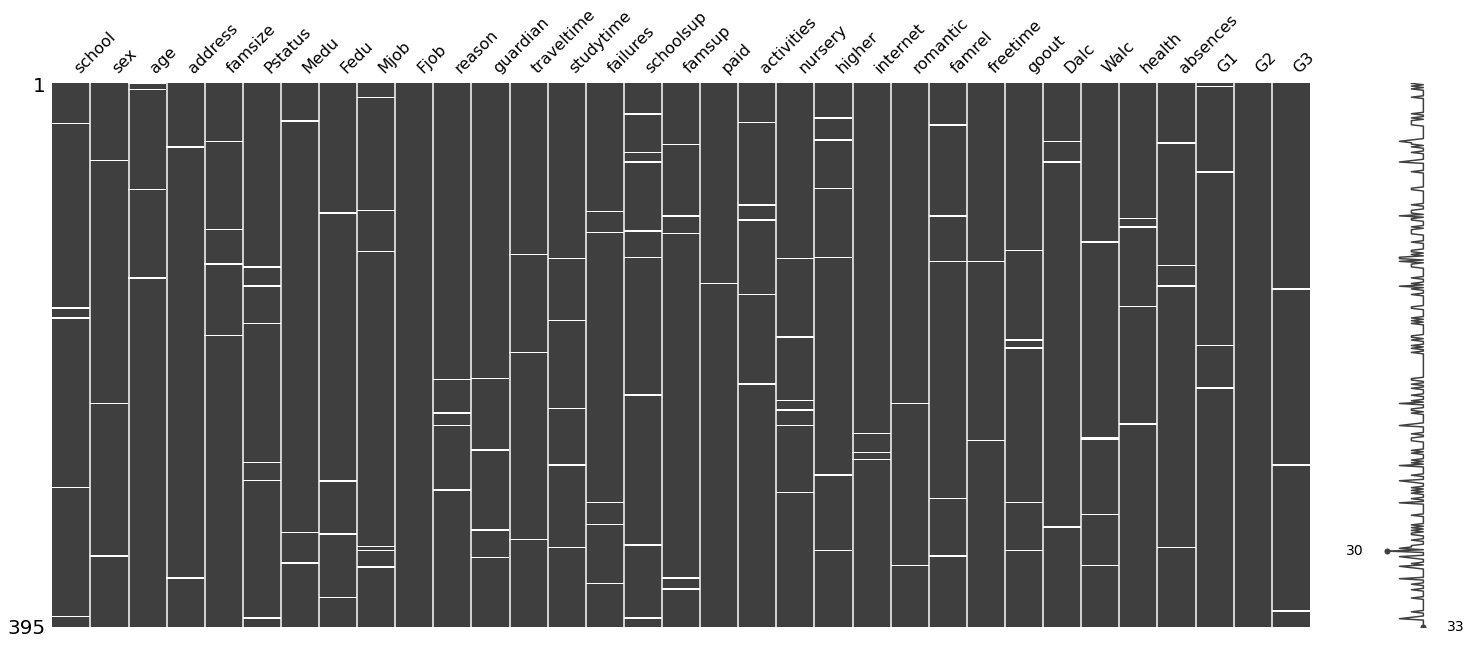

In [115]:
missingno.matrix(df_student)

In [116]:
print(f"El porcentaje de datos perdidos si eliminamos todos los N/A es de: {round(100-len(df_student.dropna())/len(df_student)*100, 2)}%")

El porcentaje de datos perdidos si eliminamos todos los N/A es de: 28.1%


In [117]:
print(len(df_student.dropna()) - len(df_student))

-111


In [118]:
df_student.dropna(inplace=True)

In [119]:
df_student.isna().sum()/df_student.shape[0]*100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

## Recodificación de String a float y de Objects a numerics

##### Estas corresponderian a las variables que tienen comillas en sus numeros. Sin embargo, el resto está como string, pero en realidad son numericos

In [120]:
df_student['age'] = df_student['age'].str.replace('\"','').astype('float')
df_student['goout'] = df_student['goout'].str.replace('\"','').astype('float')
df_student['health'] = df_student['health'].str.replace('\"','').astype('float')

In [121]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      284 non-null    object 
 1   sex         284 non-null    object 
 2   age         284 non-null    float64
 3   address     284 non-null    object 
 4   famsize     284 non-null    object 
 5   Pstatus     284 non-null    object 
 6   Medu        284 non-null    object 
 7   Fedu        284 non-null    object 
 8   Mjob        284 non-null    object 
 9   Fjob        284 non-null    object 
 10  reason      284 non-null    object 
 11  guardian    284 non-null    object 
 12  traveltime  284 non-null    object 
 13  studytime   284 non-null    object 
 14  failures    284 non-null    object 
 15  schoolsup   284 non-null    object 
 16  famsup      284 non-null    object 
 17  paid        284 non-null    object 
 18  activities  284 non-null    object 
 19  nursery     284 non-null    o

In [122]:
df = df_student.copy()
for colname,col in df.iteritems():
    try:
        col_aux=col.astype('float32')
    except:
        col_aux=col
    df[colname]=col_aux
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      284 non-null    object 
 1   sex         284 non-null    object 
 2   age         284 non-null    float32
 3   address     284 non-null    object 
 4   famsize     284 non-null    object 
 5   Pstatus     284 non-null    object 
 6   Medu        284 non-null    float32
 7   Fedu        284 non-null    float32
 8   Mjob        284 non-null    object 
 9   Fjob        284 non-null    object 
 10  reason      284 non-null    object 
 11  guardian    284 non-null    object 
 12  traveltime  284 non-null    float32
 13  studytime   284 non-null    float32
 14  failures    284 non-null    float32
 15  schoolsup   284 non-null    object 
 16  famsup      284 non-null    object 
 17  paid        284 non-null    object 
 18  activities  284 non-null    object 
 19  nursery     284 non-null    o

# EDA

In [123]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print('## {} ##'.format(i))
        print(round(df[i].value_counts('%'),2))
        print()

## school ##
GP    0.87
MS    0.13
Name: school, dtype: float64

## sex ##
F    0.52
M    0.48
Name: sex, dtype: float64

## address ##
U    0.75
R    0.25
Name: address, dtype: float64

## famsize ##
GT3    0.74
LE3    0.26
Name: famsize, dtype: float64

## Pstatus ##
T    0.9
A    0.1
Name: Pstatus, dtype: float64

## Mjob ##
other       0.36
services    0.24
teacher     0.15
at_home     0.15
health      0.09
Name: Mjob, dtype: float64

## Fjob ##
other       0.56
services    0.28
teacher     0.07
health      0.05
at_home     0.04
Name: Fjob, dtype: float64

## reason ##
course        0.36
home          0.27
reputation    0.27
other         0.10
Name: reason, dtype: float64

## guardian ##
mother    0.70
father    0.21
other     0.08
Name: guardian, dtype: float64

## schoolsup ##
no     0.87
yes    0.13
Name: schoolsup, dtype: float64

## famsup ##
yes    0.61
no     0.39
Name: famsup, dtype: float64

## paid ##
no     0.56
yes    0.44
Name: paid, dtype: float64

## activities ##
ye

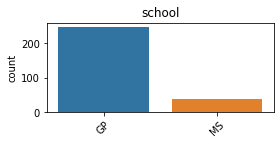

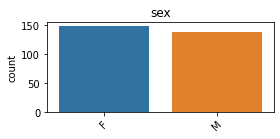

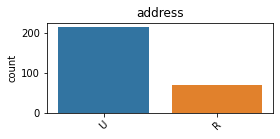

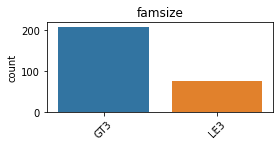

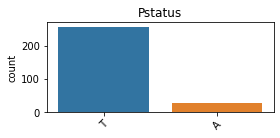

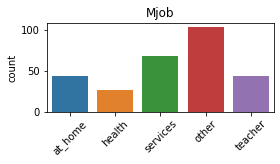

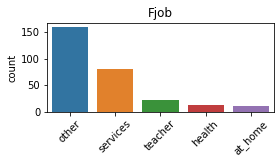

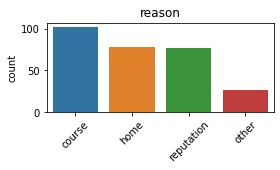

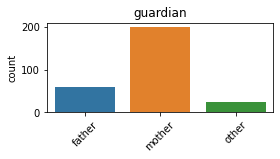

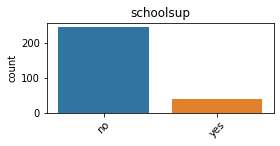

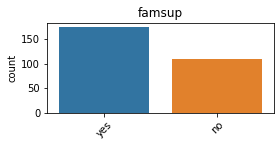

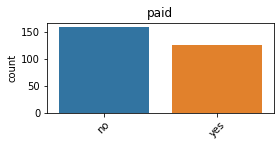

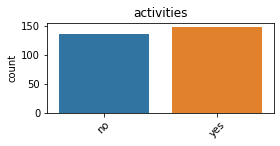

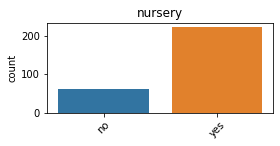

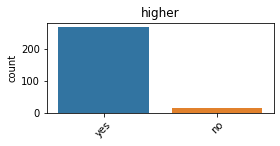

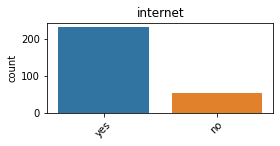

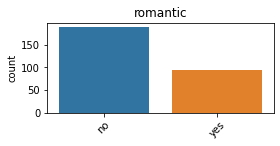

In [124]:
for colname, col in df.select_dtypes('O').iteritems():    
    plt.figure(figsize=(4,2))
    sns.countplot(df[colname])
    plt.title(colname)
    plt.xlabel("")
    plt.tight_layout()
    plt.xticks(rotation=45)

<div class="alert alert-block alert-warning">
<b>Analisis Visual de Clases:</b> 
<br>- <b>school:</b> Presenta 2 clases, con un claro desbalance siendo GP dominante sobre MS abarcando un 87% de los datos (hay mas estudiantes en Gabriel Pereira que Mousinho da Silveira). 
<br>- <b>sex:</b> Sex se encuentra bastante equilibrada, siendo femenino la mayor con el 52% de los datos frente a masculino con el 48% de los datos.
<br>- <b>address:</b> Presenta 2 clases, con un claro desvalance siendo Urbana dominante sobre Rural, abarcando 75% y 25% respectivamente. 
<br>- <b>famsize:</b> Presenta 2 clases, indicando que hay mayor registros con tamaño de familia mayor a 3 personas (74%) contra la clase LE3 con 26%. Prevalecen las familias grandes en el estudio.
<br>- <b>Pstatus:</b> Presenta 2 clases, indicando que hay mayor cantidad de familias con padres cohabitando juntos (90% vs 10% separados)
<br>- <b>Mjob:</b> Contiene 5 clases, donde la con mayor registros corresponde a Other (36% de los datos) por lo que la actividad de la madre se presenta en el 64% de los registros.
<br>- <b>Fjob:</b> Contiene 5 clases, donde la con mayor registros corresponde a Other (56% de los datos) por lo que la actividad del padre se presenta en el 44% de los registros.
<br>- <b>reason:</b> Los estudiantes prefirieron su escuela mayormente en base a la preferencia de cursos (36% de los registros, seguido de la reputacion de la escuela y la cercanía al hogar (27% c/u)
<br>- <b>guardian:</b> Presenta 3 clases, habiendo una clara prevalencia en "mother", indicando que la madre es el apoderado en 70% de los registros.
<br>- <b>schoolsup:</b> Presenta un desbalance de clases, indicando que no hay apoyo educacional del colegio en el 87% de los registros.
<br>- <b>famsup:</b> Presenta 2 clases, indicando que el apoyo educacional viene mayormente por parte de la familia (61% re los registros)
<br>- <b>paid:</b> Presenta 2 clases suficientemente equilibradas 
<br>- <b>activities:</b> Presenta 2 clases suficientemente equilibradas 
<br>- <b>nursery:</b> Presenta un desbalance de clases, dejando claro que la mayoria de los estudiantes si asistió a la guarderia (79% de los registros)
<br>- <b>higher:</b> Presenta un claro desbalance de clases, donde el 95% de los estudiantes quiere continuar sus estudios superiores.
<br>- <b>internet:</b> Presenta 2 clases, indicando que el 81% de los estudiantes tiene acceso a internet en la casa
<br>- <b>romantic:</b> Presenta 2 clases, indicando que el 67% de los estudiantes no tiene una relacion romántica

</div><br>

## AGE ##


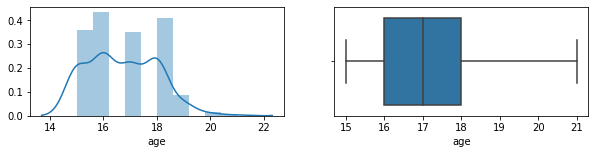

## MEDU ##


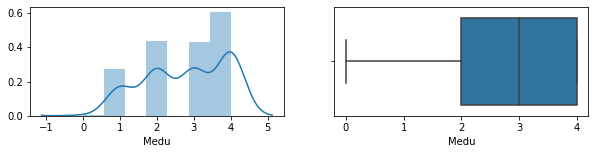

## FEDU ##


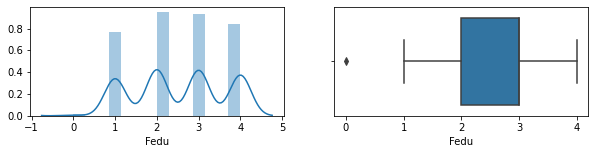

## TRAVELTIME ##


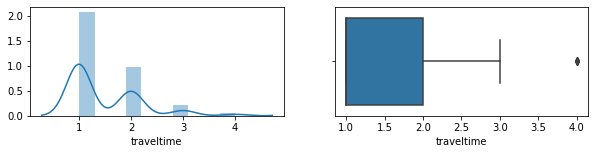

## STUDYTIME ##


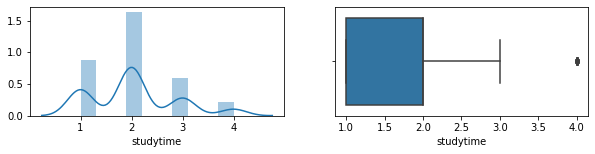

## FAILURES ##


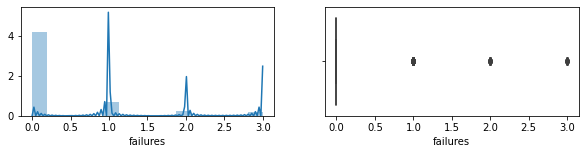

## FAMREL ##


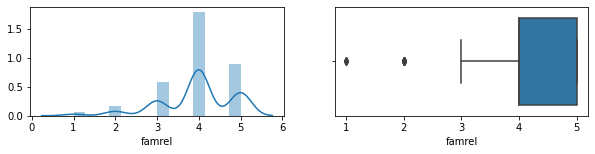

## FREETIME ##


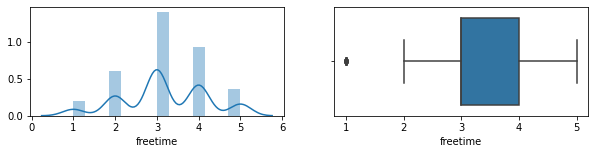

## GOOUT ##


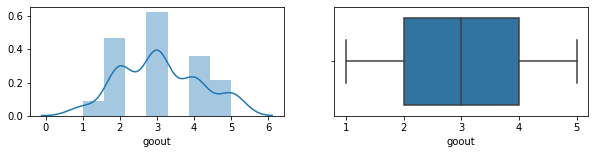

## DALC ##


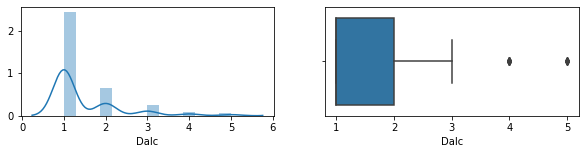

## WALC ##


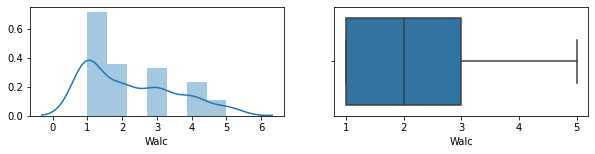

## HEALTH ##


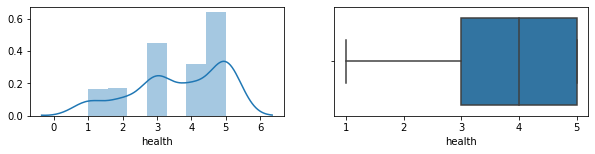

## ABSENCES ##


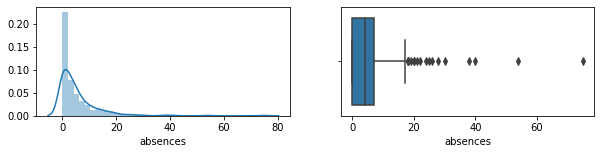

## G1 ##


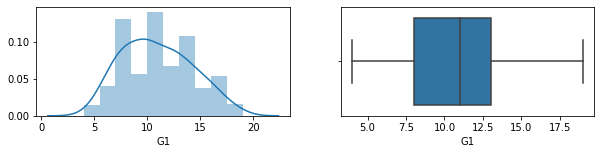

## G2 ##


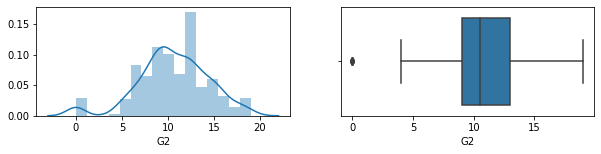

## G3 ##


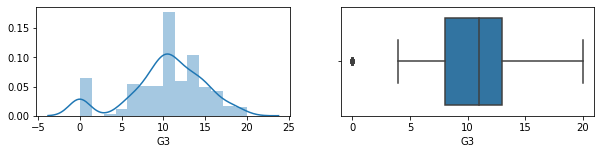

In [125]:
for col in df.columns:
    if df[col].dtypes == 'float32':
        if col == 'income':
            sns.countplot(df[col])
        else:
            fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,2))
            print("## {} ##".format(col.upper()))
            sns.distplot(df[col], ax=ax1)
            sns.boxplot(df[col], ax=ax2)
            plt.show()

<div class="alert alert-block alert-warning">
<b>Analisis Visual de Clases:</b> 
<br>- <b>age:</b> Presenta 4 tendencias, el 75% de los datos se ubica por debajo de los 18 años, con una mediana de 17.
<br>- <b>Medu:</b> La mayor cantidad de datos se observa entre valor 2 y 4, siendo el mayor 4, indicando que hay más cantidad de madres con estudios de enseñanza superior en la muestra.
<br>- <b>Fedu:</b> El rango se concentra principalmente entre estudios básicos a superior, habiendo existencia de outliers en la muestra que no presentan educación. La mayor cantidad de datos se observa entre el nivel de educación de educación básica y media, seguido de enseñanza superior.
<br>- <b>traveltime:</b> La mayor cantidad de estudiantes tarda hasta 30 minutos en el viaje entre el hogar y el colegio. Habiendo baja presencia de estudiantes que tardan más que eso.
<br>- <b>studytime:</b> La mayor cantidad de estudiantes dedica entre 15 a 30 minutos de estudio a la semana. La tendencia se ubica entre menos de 15 minutos y este valor, habiendo existencia de periodos más extensos, pero en menor cantidad. 
<br>- <b>failures:</b> La mayor cantidad de estudiantes no ha reprobado clases. 
<br>- <b>famrel:</b> La mayor cantidad de registros posee buena calidad de relaciones familiares, habiendo casos de experiencias malas.
<br>- <b>freetime:</b> La mayor cantidad de estudiantes posee bastante tiempo libre fuera del colegio, concentrando sus datos entre 3 y 4 (siendo 5, "mucho tiempo").
<br>- <b>goout:</b> Las salidas con amigos se distribuyen normalmente, habiendo una tendencia al punto medio. Esto y otras variables indicarían que <b> los estudiantes aprovechan su tiempo libre para salir con amigos en vez de estudiar</b>.
<br>- <b>dalc:</b> A pesar de la baja edad de los estudiantes, se aprecia el consumo de alcohol en ellos a pesar de ser muy poco en la mayoría de los casos.
<br>- <b>walc:</b> Esto se condice con dalc, ya que los alumnos tienden a beber más los fines de semana.
<br>- <b>health:</b> Se aprecia que la mayoria de los registros indica que los estudiantes tendría un buen estado de salud.
<br>- <b>absences:</b> La mayor cantidad de registros está por debajo de las 20 inasistencias. Sin embargo, hay presencia de casos outliers que indicaría una gran cantidad de inasistencia por parte de dichos estudiantes.
<br>- <b>G1:</b> Las notas durante el primer semestre tienen una tendencia a estar entre el 7.5 hasta el 12.5, estando la mediana alrededor del 11. Hay presencia de pésimas calificaciones.
<br>- <b>G2:</b> Las notas durante el segundo emestre tienen una tendencia a estar entre el 9 al 13, esto indicaría que el segundo semestre los estudiantes mejoran sus notas.
<br>- <b>G3:</b> El promedio final de los estudiantes mantiene una tendencia parecida a las notas del segundo semestre, pero el rango sería un poco mayor, estando entre el 7 y el 13, esto debido a que las notas del primer semestre bajar el promedio.

</div><br>

# Modelación descriptiva
## Correlacion de las variables

In [126]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [128]:
df_dummies.shape

(284, 42)

In [129]:
def fetch_features(df,vector_objetivo='G3'):
    # extraemos los nombres de las columnas en la base de datos
    columnas = df.columns
    
    # generamos 3 arrays vacíos para guardar los valores 
    # nombre de la variable
    attr_name = []
    # correlación de pearson
    pearson_r = []
    # valor absoluto de la correlación 
    abs_pearson_r = []
    
    # para cada columna en el array de columnas
    for col in columnas:
        # si la columna no es la dependiente 
        if col != vector_objetivo:
            # adjuntar el nombre de la variable en attr_name
            attr_name.append(col)
            # adjuntar la correlación de pearson 
            pearson_r.append(df[col].corr(df[vector_objetivo]))
            # adjuntar el valor absoluto de la correlación de pearson 
            abs_pearson_r.append(abs(df[col].corr(df[vector_objetivo])))
            
    # transformamos los arrays en un DataFrame
    features = pd.DataFrame({
        f'{vector_objetivo} vs': attr_name, 
        'corr':pearson_r, 
        'abs_corr':abs_pearson_r
    })
    # generamos el index con los nombres de las variables
    features = features.set_index(f'{vector_objetivo} vs')
    # ordenamos los valores de forma descendiente 
    features.sort_values(by=['abs_corr'], ascending=False)
    #print(f"Correlaciones contra {vector_objetivo}\n")
    return(features)

In [132]:
fetch_features(df_dummies.drop(columns=['G1','G2'])).sort_values('abs_corr', ascending=False).head(7)

,corr,abs_corr
G3 vs,,
failures,-0.345628,0.345628
goout,-0.221752,0.221752
Medu,0.180326,0.180326
higher_yes,0.162044,0.162044
age,-0.132134,0.132134
address_U,0.119397,0.119397
health,-0.116279,0.116279


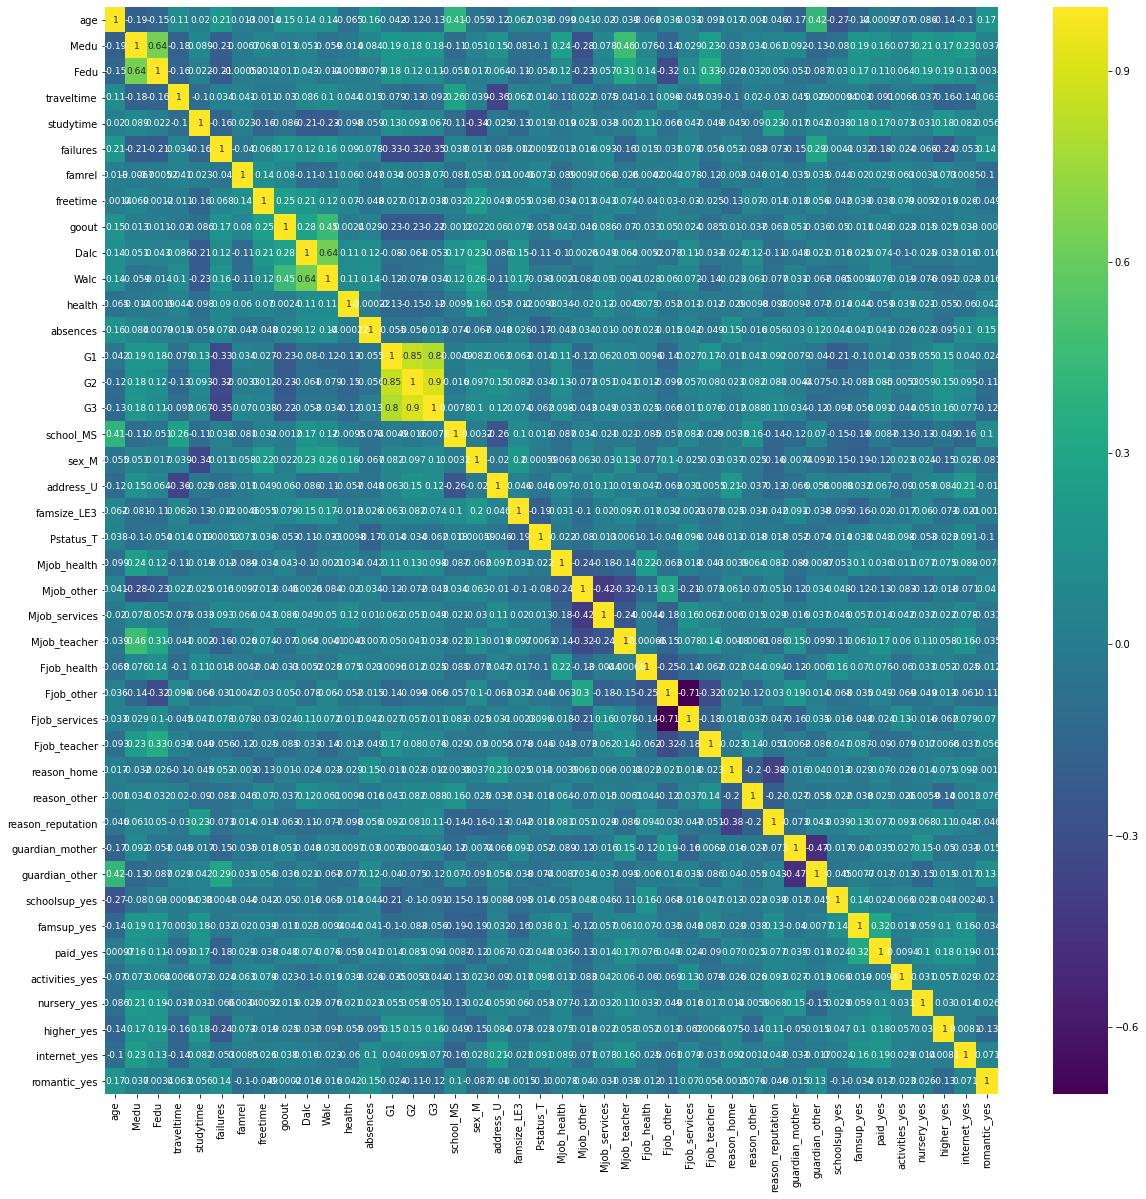

In [134]:
plt.figure(figsize=(20,20))
sns.heatmap(df_dummies.corr(), annot=True, cmap='viridis', annot_kws={'fontsize':9})

<div class="alert alert-block alert-warning">
<b>Analisis de correlaciones:</b> 
Se observa claramente la alta correlación entre los vectores objetivos, sin embargo no entre el resto las variables.
<br>Se contruirá un modelo con todas las variables, excepto los promedios, por cada uno de los promedios. Luego serás filtrados por p-value para ir mejorando el desempeño de la regresión lineal.
</div><br>

In [135]:
auxvar = ""
for i in df_dummies.columns:
    if i in ['G1','G2','G3']: 
        continue
    else:
        auxvar += "{} + ".format(i)

# Modelacion descriptiva para G1

In [165]:
auxvar

'age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + school_MS + sex_M + address_U + famsize_LE3 + Pstatus_T + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services + Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other + schoolsup_yes + famsup_yes + paid_yes + activities_yes + nursery_yes + higher_yes + internet_yes + romantic_yes + '

In [138]:
model_G1 = smf.ols('G1 ~ {}'.format(auxvar[:-2]), data=df_dummies).fit()

In [139]:
model_G1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.090
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           5.75e-08
Time:                        15:46:49   Log-Likelihood:                -683.63
No. Observations:                 284   AIC:                             1447.
Df Residuals:                     244   BIC:                             1593.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.1487      3.682      2.756      0.006       2.895      17.402
age                   0.0772      0.185      0.418      0.677      -0.287       0.441
Medu                  0.1809      0.282      0.642      0.521      -0.374       0.736
Fedu                  0.1527      0.236      0.646      0.519      -0.313       0.618
traveltime           -0.0215      0.291     -0.074      0.941      -0.594       0.551
studytime             0.5074      0.245      2.068      0.040       0.024       0.991
failures             -1.1235      0.282     -3.977      0.000      -1.680      -0.567
famrel                0.1449      0.213      0.681      0.497      -0.274       0.564
freetime              0.3778      0.193      1.959      0.051      -0.002       0.758
goout                -0.7691      0.199     -3.873      0.000      -1.160      -0.378
Dalc                 -0.0730      0.286     -0.255      0.799      -0.636       0.490
Walc                  0.1585      0.210      0.756      0.451      -0.255       0.572
health               -0.2918      0.142     -2.062      0.040      -0.571      -0.013
absences             -0.0048      0.024     -0.196      0.845      -0.053       0.043
school_MS            -0.3886      0.666     -0.583      0.560      -1.701       0.924
sex_M                 0.7631      0.432      1.768      0.078      -0.087       1.613
address_U             0.0205      0.487      0.042      0.966      -0.939       0.980
famsize_LE3           0.3125      0.440      0.710      0.478      -0.555       1.180
Pstatus_T            -0.1872      0.650     -0.288      0.774      -1.468       1.094
Mjob_health           1.0251      0.918      1.116      0.265      -0.784       2.834
Mjob_other           -0.5423      0.598     -0.907      0.365      -1.720       0.636
Mjob_services         0.3913      0.676      0.579      0.563      -0.939       1.722
Mjob_teacher         -1.0850      0.836     -1.298      0.195      -2.731       0.561
Fjob_health          -1.0572      1.304     -0.810      0.418      -3.626       1.512
Fjob_other           -1.4765      0.984     -1.500      0.135      -3.415       0.462
Fjob_services        -0.8524      0.990     -0.861      0.390      -2.801       1.097
Fjob_teacher          0.8167      1.196      0.683      0.495      -1.540       3.173
reason_home           0.3701      0.473      0.783      0.434      -0.561       1.301
reason_other          0.1005      0.675      0.149      0.882      -1.230       1.431
reason_reputation     0.5312      0.487      1.090      0.277      -0.429       1.491
guardian_mother       0.2087      0.479      0.436      0.663      -0.734       1.152
guardian_other        0.2967      0.850      0.349      0.727      -1.377       1.971
schoolsup_yes        -1.7737      0.564     -3.145      0.002      -2.885

### Filtro de variables por p-valor -> G1

In [141]:
df = df_dummies.copy()

In [145]:
X = df_dummies.drop(columns=['G1','G2','G3'])
Y = df_dummies['G1']

In [147]:
print(X.shape, Y.shape)

(284, 39) (284,)


In [149]:

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['studytime', 'failures', 'freetime', 'goout', 'health', 'Mjob_health', 'Mjob_services', 'Fjob_teacher', 'schoolsup_yes', 'famsup_yes']


In [164]:
#"+".join(i for i in selected_features_BE)

In [156]:
formula = "G1 ~ {}".format("+".join(i for i in selected_features_BE))

In [157]:
model_G1_2 = smf.ols(formula, data=df_dummies).fit()

In [158]:
model_G1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     10.98
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.02e-15
Time:                        16:40:22   Log-Likelihood:                -692.61
No. Observations:                 284   AIC:                             1407.
Df Residuals:                     273   BIC:                             1447.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.4853      0.981     12.723      0.000      10.553      14.417
studytime         0.4718      0.209      2.253      0.025       0.060       0.884
failures         -1.2532      0.237     -5.277      0.000      -1.721      -0.786
freetime          0.4117      0.173      2.383      0.018       0.072       0.752
goout            -0.6736      0.165     -4.091      0.000      -0.998      -0.349
health           -0.2960      0.130     -2.280      0.023      -0.552      -0.040
Mjob_health       1.8964      0.600      3.160      0.002       0.715       3.078
Mjob_services     1.2028      0.408      2.950      0.003       0.400       2.006
Fjob_teacher      1.9920      0.651      3.059      0.002       0.710       3.274
schoolsup_yes    -1.9478      0.501     -3.890      0.000      -2.934      -0.962
famsup_yes       -0.9938      0.360     -2.760      0.006      -1.703      -0.285
==============================================================================
Omnibus:                        6.719   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.325
Skew:                           0.132   Prob(JB):                        0.115
Kurtosis:                       2.456   Cond. No.                         37.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br> Todas las variables juntas explican el 33% de la variabilidad de G1. La reducción de variables hizo que el modelo empeorara, explicando el 29% de la variabilidad, siendo <b>Fjob_teacher</b> la que mayor contribucion aporta, seguido de <b>Mjob_health</b>.
<br>El trabajo de los padres parece ser importante para el promedio de los hijos.
</div>

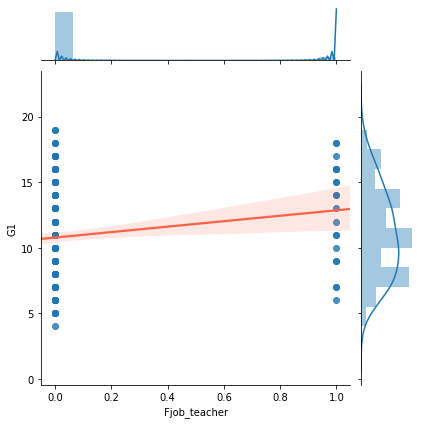

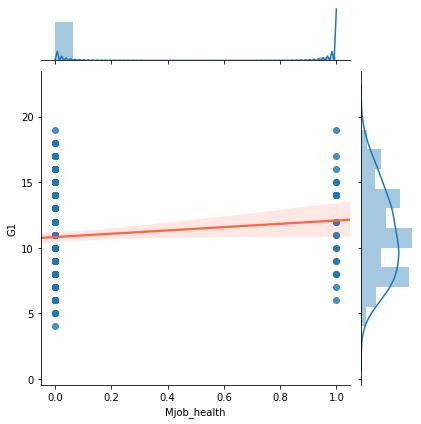

In [175]:
for k in ['Fjob_teacher', 'Mjob_health']:
    sns.jointplot(y="G1", x=k, data=df_dummies, line_kws={'color':'tomato'}, kind='reg')
    plt.show()

<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br>Las variables más importantes describen positivamente (pendiente de la recta) a G1
</div>

# Modelacion Descriptiva para G2

In [166]:
model_G2 = smf.ols('G2 ~ {}'.format(auxvar[:-2]), data=df_dummies).fit()

In [167]:
model_G2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     2.693
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           2.14e-06
Time:                        17:23:18   Log-Likelihood:                -729.98
No. Observations:                 284   AIC:                             1540.
Df Residuals:                     244   BIC:                             1686.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.3513      4.335      2.849      0.005       3.812      20.891
age                  -0.0696      0.218     -0.320      0.749      -0.498       0.359
Medu                  0.3221      0.332      0.971      0.332      -0.331       0.975
Fedu                 -0.1232      0.278     -0.443      0.658      -0.671       0.425
traveltime           -0.2211      0.342     -0.646      0.519      -0.896       0.453
studytime             0.4171      0.289      1.444      0.150      -0.152       0.986
failures             -1.1293      0.333     -3.396      0.001      -1.784      -0.474
famrel                0.0282      0.251      0.112      0.911      -0.466       0.522
freetime              0.3319      0.227      1.462      0.145      -0.115       0.779
goout                -0.9655      0.234     -4.130      0.000      -1.426      -0.505
Dalc                 -0.2099      0.337     -0.624      0.533      -0.873       0.453
Walc                  0.3593      0.247      1.455      0.147      -0.127       0.846
health               -0.3901      0.167     -2.342      0.020      -0.718      -0.062
absences             -0.0079      0.029     -0.274      0.785      -0.064       0.049
school_MS             0.2397      0.785      0.305      0.760      -1.306       1.785
sex_M                 0.8885      0.508      1.748      0.082      -0.112       1.889
address_U             0.7540      0.573      1.315      0.190      -0.375       1.883
famsize_LE3           0.4639      0.518      0.895      0.372      -0.557       1.485
Pstatus_T            -0.5952      0.766     -0.777      0.438      -2.103       0.913
Mjob_health           1.3034      1.081      1.205      0.229      -0.827       3.433
Mjob_other           -0.0448      0.704     -0.064      0.949      -1.432       1.342
Mjob_services         0.5276      0.795      0.663      0.508      -1.039       2.094
Mjob_teacher         -0.9595      0.984     -0.975      0.330      -2.898       0.979
Fjob_health          -0.3798      1.536     -0.247      0.805      -3.405       2.645
Fjob_other           -0.6572      1.159     -0.567      0.571      -2.940       1.625
Fjob_services         0.2459      1.165      0.211      0.833      -2.049       2.541
Fjob_teacher          1.0391      1.408      0.738      0.461      -1.735       3.813
reason_home           0.4672      0.556      0.840      0.402      -0.629       1.563
reason_other          0.7999      0.795      1.006      0.315      -0.766       2.366
reason_reputation     0.6478      0.574      1.129      0.260      -0.482       1.778
guardian_mother       0.0425      0.564      0.075      0.940      -1.067       1.152
guardian_other        0.0403      1.001      0.040      0.968      -1.931       2.011
schoolsup_yes        -1.0396      0.664     -1.566      0.119      -2.347

### Filtro de variables por p-valor -> G2

In [168]:
df = df_dummies.copy()
X = df_dummies.drop(columns=['G1','G2','G3'])
Y = df_dummies['G2']

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['failures', 'goout', 'health', 'sex_M', 'Mjob_health', 'Mjob_services']


In [169]:
formula = "G2 ~ {}".format("+".join(i for i in selected_features_BE))

model_G2_2 = smf.ols(formula, data=df_dummies).fit()
model_G2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     12.38
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           2.39e-12
Time:                        17:26:09   Log-Likelihood:                -747.09
No. Observations:                 284   AIC:                             1508.
Df Residuals:                     277   BIC:                             1534.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.1306      0.834     16.935      0.000      12.488      15.773
failures         -1.4841      0.282     -5.256      0.000      -2.040      -0.928
goout            -0.7308      0.191     -3.818      0.000      -1.108      -0.354
health           -0.4998      0.157     -3.176      0.002      -0.810      -0.190
sex_M             1.1247      0.411      2.735      0.007       0.315       1.934
Mjob_health       2.2923      0.716      3.202      0.002       0.883       3.702
Mjob_services     1.3415      0.489      2.745      0.006       0.379       2.304
==============================================================================
Omnibus:                       13.466   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.062
Skew:                          -0.447   Prob(JB):                     0.000536
Kurtosis:                       3.687   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br> Todas las variables juntas explican el 30% de la variabilidad de G2. La reducción de variables hizo que el modelo empeorara, explicando el 21% de la variabilidad, siendo <b>Mjob_health</b> la que mayor contribucion aporta, seguido de <b>Mjob_services</b>.
<br>Nuevamente el trabajo de la madre es una variable importante
</div>

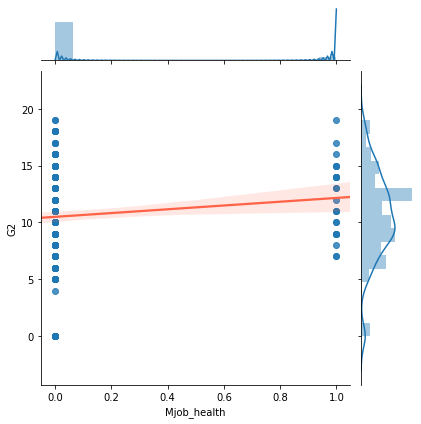

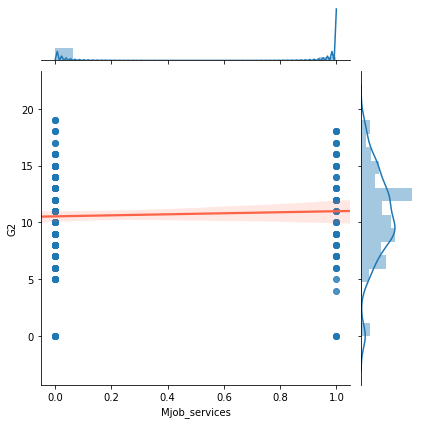

In [178]:
for k in ['Mjob_health', 'Mjob_services']:
    sns.jointplot(y="G2", x=k, data=df_dummies, line_kws={'color':'tomato'}, kind='reg')
    plt.show()

<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br>Las variables más importantes describen positivamente (pendiente de la recta) a G2
</div>

# Modelacion Descriptiva para G3

In [179]:
model_G3 = smf.ols('G3 ~ {}'.format(auxvar[:-2]), data=df_dummies).fit()
model_G2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     2.693
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           2.14e-06
Time:                        17:35:55   Log-Likelihood:                -729.98
No. Observations:                 284   AIC:                             1540.
Df Residuals:                     244   BIC:                             1686.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.3513      4.335      2.849      0.005       3.812      20.891
age                  -0.0696      0.218     -0.320      0.749      -0.498       0.359
Medu                  0.3221      0.332      0.971      0.332      -0.331       0.975
Fedu                 -0.1232      0.278     -0.443      0.658      -0.671       0.425
traveltime           -0.2211      0.342     -0.646      0.519      -0.896       0.453
studytime             0.4171      0.289      1.444      0.150      -0.152       0.986
failures             -1.1293      0.333     -3.396      0.001      -1.784      -0.474
famrel                0.0282      0.251      0.112      0.911      -0.466       0.522
freetime              0.3319      0.227      1.462      0.145      -0.115       0.779
goout                -0.9655      0.234     -4.130      0.000      -1.426      -0.505
Dalc                 -0.2099      0.337     -0.624      0.533      -0.873       0.453
Walc                  0.3593      0.247      1.455      0.147      -0.127       0.846
health               -0.3901      0.167     -2.342      0.020      -0.718      -0.062
absences             -0.0079      0.029     -0.274      0.785      -0.064       0.049
school_MS             0.2397      0.785      0.305      0.760      -1.306       1.785
sex_M                 0.8885      0.508      1.748      0.082      -0.112       1.889
address_U             0.7540      0.573      1.315      0.190      -0.375       1.883
famsize_LE3           0.4639      0.518      0.895      0.372      -0.557       1.485
Pstatus_T            -0.5952      0.766     -0.777      0.438      -2.103       0.913
Mjob_health           1.3034      1.081      1.205      0.229      -0.827       3.433
Mjob_other           -0.0448      0.704     -0.064      0.949      -1.432       1.342
Mjob_services         0.5276      0.795      0.663      0.508      -1.039       2.094
Mjob_teacher         -0.9595      0.984     -0.975      0.330      -2.898       0.979
Fjob_health          -0.3798      1.536     -0.247      0.805      -3.405       2.645
Fjob_other           -0.6572      1.159     -0.567      0.571      -2.940       1.625
Fjob_services         0.2459      1.165      0.211      0.833      -2.049       2.541
Fjob_teacher          1.0391      1.408      0.738      0.461      -1.735       3.813
reason_home           0.4672      0.556      0.840      0.402      -0.629       1.563
reason_other          0.7999      0.795      1.006      0.315      -0.766       2.366
reason_reputation     0.6478      0.574      1.129      0.260      -0.482       1.778
guardian_mother       0.0425      0.564      0.075      0.940      -1.067       1.152
guardian_other        0.0403      1.001      0.040      0.968      -1.931       2.011
schoolsup_yes        -1.0396      0.664     -1.566      0.119      -2.347

### Filtro de variables por p-valor -> G3

In [180]:
df = df_dummies.copy()
X = df_dummies.drop(columns=['G1','G2','G3'])
Y = df_dummies['G3']

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Medu', 'failures', 'freetime', 'goout', 'Walc', 'health', 'Mjob_teacher']


In [181]:
formula = "G3 ~ {}".format("+".join(i for i in selected_features_BE))

model_G3_2 = smf.ols(formula, data=df_dummies).fit()
model_G3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     10.24
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           2.07e-11
Time:                        17:36:57   Log-Likelihood:                -800.97
No. Observations:                 284   AIC:                             1618.
Df Residuals:                     276   BIC:                             1647.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.4311      1.306      8.754      0.000       8.861      14.002
Medu             0.7428      0.257      2.892      0.004       0.237       1.249
failures        -1.8924      0.351     -5.397      0.000      -2.583      -1.202
freetime         0.5059      0.249      2.028      0.044       0.015       0.997
goout           -1.1727      0.265     -4.419      0.000      -1.695      -0.650
Walc             0.5216      0.217      2.405      0.017       0.095       0.949
health          -0.3822      0.188     -2.032      0.043      -0.752      -0.012
Mjob_teacher    -1.5606      0.770     -2.026      0.044      -3.077      -0.044
==============================================================================
Omnibus:                       20.910   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.367
Skew:                          -0.658   Prob(JB):                     8.43e-06
Kurtosis:                       3.493   Cond. No.                         37.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br> Todas las variables juntas explican el 30% de la variabilidad de G3. La reducción de variables hizo que el modelo empeorara, explicando el 20% de la variabilidad, siendo <b>Medu</b> la que mayor contribucion aporta, seguido de <b>Walc</b>.
<br>Es extraño que tanto la educación de la madre como el consumo de alcohol no sean tan relevantes a nivel de semestre pero si en promedio final

</div>

# Modelacion Predictiva para G3

In [190]:
# División entre entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(df_dummies[selected_features_BE], Y, test_size = .33, random_state=1111)


In [191]:
model_G3_i = linear_model.LinearRegression(fit_intercept=True, normalize=True)

In [192]:
model_G3_i.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [193]:
yhat = model_G3_i.predict(x_test)

In [194]:
def report_scores(test,modelo):
    mse = mean_squared_error(test,modelo).round(2)
    r2 = r2_score(test,modelo).round(2)
    print(f"MSE: {mse}\nR2: {r2}")

In [195]:
print("\nTest vs Modelo con Intercepto y Atributos Normalizados")
report_scores(y_test,yhat)


Test vs Modelo con Intercepto y Atributos Normalizados
MSE: 19.940000534057617
R2: 0.04


<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br> El modelo presenta un pésimo R2, las variables filtradas mediante modelación descriptiva sólo explican el 4% en un modelo de machine learning. Su alto MSE indica que los datos predichos no se acercan a los datos observados de los estudiantes.
</div>

### Modelación a partir de la correlación de la variable objetivo con todas las demas variables

In [199]:
fetch_features(df_dummies, vector_objetivo='G3').sort_values(by='abs_corr').head()

,corr,abs_corr
G3 vs,,
school_MS,0.007823,0.007823
Fjob_services,0.011079,0.011079
reason_home,-0.011701,0.011701
absences,0.013487,0.013487
Fjob_health,0.025406,0.025406


<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br>Las correlaciones son bajísimas, sin embargo se modelará con las mejores 5 observaciones
</div>

In [202]:
# División entre entrenamiento y validación
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_dummies[['school_MS','Fjob_services','reason_home','absences','Fjob_health']], Y, test_size = .33, random_state=1111)

In [204]:
model_G3_i_2 = linear_model.LinearRegression(fit_intercept=True, normalize=True).fit(x_train_2,y_train_2)
yhat_2 = model_G3_i_2.predict(x_test_2)

In [205]:
print("\nTest vs Modelo con Intercepto, Atributos Normalizados y las variables mas correlacionadas")
report_scores(y_test_2,yhat_2)


Test vs Modelo con Intercepto, Atributos Normalizados y las variables mas correlacionadas
MSE: 21.309999465942383
R2: -0.03


<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br>El modelo claramente es peor que el anterior.
</div>